In [4]:

import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [5]:
DATASET="D:/Jain University Project/Mini project/Data collection/tomato/10k/train"
DATASET2="D:/Jain University Project/Mini project/Data collection/tomato/10k/test"


In [6]:
CATEGORIES=["Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___healthy","Tomato___Late_blight","Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite","Tomato___Target_spot","Tomato___Tomato_mosaic_virus","Tomato___Tomato_Yellow_Leaf_Curl_Virus"]

In [7]:
        
train_data=[]

for category in CATEGORIES:
        label=CATEGORIES.index(category)   #index of catagory is given 
        path=os.path.join(DATASET,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))            
            train_data.append([img,label])
        

In [8]:
test_data=[]

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET2,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))            
            test_data.append([img,label])

In [9]:
print(len(train_data))
print(len(test_data))


8800
1200


In [10]:
import random

random.shuffle(train_data)
random.shuffle(test_data)

In [11]:

for lbl in train_data[:10]:
    print(lbl[1])

5
7
5
4
4
4
1
2
2
7


In [12]:
X_train=[]
y_train=[]

for features,label in train_data:
    X_train.append(features)
    y_train.append(label)

In [13]:
y_train[2]

5

In [14]:
Y=[]
for i in y_train:
    if i==0:
        Y.append("BACTERIAL SPOT")
    elif i==1:
        Y.append("EARLY BLIGHT")
    elif i==2:
        Y.append("HEALTHY")
    elif i==3:
        Y.append("LATE BLIGHT")
    elif i==4:
        Y.append("LEAF MOLD")
    elif i==5:
        Y.append("SEPTORIA LEAF SPOT")
    elif i==6:
        Y.append("SPIDER MITE")
    elif i==7:
        Y.append("TARGET SPOT")
    elif i==8:
        Y.append("MOSAIC VIRUS")
    else:
        Y.append("YELLOW LEAF CURL VIRUS")

len(X_train),len(y_train)


(8800, 8800)

In [15]:
X_test=[]
y_test=[]

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)

In [16]:
Z=[]
for i in y_test:
    if i==0:
        Z.append("BACTERIAL SPOT")
    elif i==1:
        Z.append("EARLY BLIGHT")
    elif i==2:
        Z.append("HEALTHY")
    elif i==3:
        Z.append("LATE BLIGHT")
    elif i==4:
        Z.append("LEAF MOLD")
    elif i==5:
        Z.append("SEPTORIA LEAF SPOT")
    elif i==6:
        Z.append("SPIDER MITE")
    elif i==7:
        Z.append("TARGET SPOT")
    elif i==8:
        Z.append("MOSAIC VIRUS")
    else:
        Z.append("YELLOW LEAF CURL VIRUS")

len(X_test),len(y_test)

(1200, 1200)

In [17]:
#reshaping the pixelvalue 
X_train=np.array(X_train).reshape(-1,64,64,3)
X_train=X_train/255.0
X_train.shape

(8800, 64, 64, 3)

In [18]:
X_train[1]


array([[[0.59607843, 0.54509804, 0.58431373],
        [0.63529412, 0.58431373, 0.62352941],
        [0.69411765, 0.64313725, 0.68235294],
        ...,
        [0.50588235, 0.45490196, 0.49411765],
        [0.52941176, 0.47843137, 0.51764706],
        [0.51372549, 0.4627451 , 0.50196078]],

       [[0.59607843, 0.54509804, 0.58431373],
        [0.65490196, 0.60392157, 0.64313725],
        [0.61568627, 0.56470588, 0.60392157],
        ...,
        [0.56470588, 0.51372549, 0.55294118],
        [0.57647059, 0.5254902 , 0.56470588],
        [0.56862745, 0.51764706, 0.55686275]],

       [[0.57647059, 0.5254902 , 0.56470588],
        [0.61960784, 0.56862745, 0.60784314],
        [0.55686275, 0.50588235, 0.54509804],
        ...,
        [0.49411765, 0.44313725, 0.48235294],
        [0.54509804, 0.49411765, 0.53333333],
        [0.5254902 , 0.4745098 , 0.51372549]],

       ...,

       [[0.61960784, 0.57254902, 0.61176471],
        [0.68235294, 0.63529412, 0.6745098 ],
        [0.69803922, 0

In [19]:
X_test=np.array(X_test).reshape(-1,64,64,3)
X_test=X_test/255.0
X_test.shape

(1200, 64, 64, 3)

In [20]:
order=['BACTERIAL SPOT','EARLY BLIGHT','HEALTHY','LATE BLIGHT','LEAF MOLD','SEPTORIA LEAF SPOT','SPIDER MITE','TARGET SPOT','MOSAIC VIRUS','YELLOW LEAF CURL VIRUS']


C:\Users\Jagga\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Image Count')

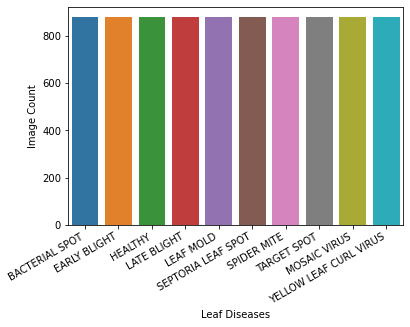

In [21]:
ax=sns.countplot(Y, order=order)
ax.set_xlabel("Leaf Diseases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.set_ylabel("Image Count")


C:\Users\Jagga\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Image Count')

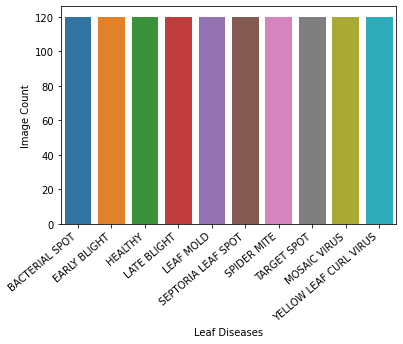

In [22]:
ax=sns.countplot(Z, order=order)
ax.set_xlabel("Leaf Diseases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylabel("Image Count")

In [23]:

from keras.utils import to_categorical

one_hot_train=to_categorical(y_train)
one_hot_train

one_hot_test=to_categorical(y_test)
one_hot_test


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout

In [25]:
classifier=Sequential()

classifier.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(64,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(128,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.4))

classifier.add(Flatten())

classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='relu', units=128))
classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='softmax', units=10))

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       7

In [26]:
hist=classifier.fit(X_train,one_hot_train,epochs=50,batch_size=128,validation_split=0.2)

Epoch 1/50
55/55 [==============================] - 21s 375ms/step - loss: 2.1580 - accuracy: 0.1991 - val_loss: 1.8612 - val_accuracy: 0.3864
Epoch 2/50
55/55 [==============================] - 20s 368ms/step - loss: 1.6362 - accuracy: 0.4369 - val_loss: 1.5793 - val_accuracy: 0.4665
Epoch 3/50
55/55 [==============================] - 23s 413ms/step - loss: 1.3012 - accuracy: 0.5534 - val_loss: 1.1567 - val_accuracy: 0.6176
Epoch 4/50
55/55 [==============================] - 19s 349ms/step - loss: 0.9946 - accuracy: 0.6607 - val_loss: 0.9770 - val_accuracy: 0.6659
Epoch 5/50
55/55 [==============================] - 19s 351ms/step - loss: 0.7899 - accuracy: 0.7284 - val_loss: 0.6722 - val_accuracy: 0.7790
Epoch 6/50
55/55 [==============================] - 19s 346ms/step - loss: 0.7013 - accuracy: 0.7534 - val_loss: 0.6159 - val_accuracy: 0.7972
Epoch 7/50
55/55 [==============================] - 19s 347ms/step - loss: 0.5906 - accuracy: 0.7909 - val_loss: 0.5058 - val_accuracy: 0.8369

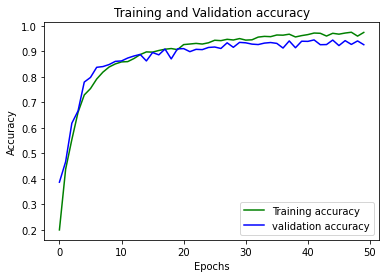

In [27]:
loss_train = hist.history['accuracy']
loss_val = hist.history['val_accuracy']
plt.plot( loss_train, 'g', label='Training accuracy')
plt.plot(loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

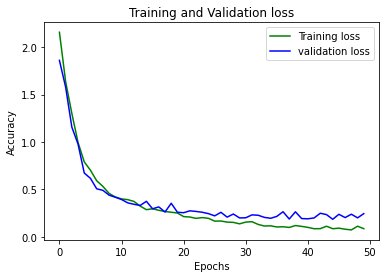

In [28]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']
plt.plot( loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
test_loss,test_acc=classifier.evaluate(X_test,one_hot_test)
test_loss,test_acc

38/38 [==============================] - 1s 25ms/step - loss: 0.2771 - accuracy: 0.9258


(0.2770773768424988, 0.9258333444595337)

In [30]:
y_pred=classifier.predict_classes(X_test)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([5, 0, 8, ..., 9, 0, 3], dtype=int64)

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import itertools
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[113   1   0   1   0   0   1   1   0   3]
 [  4  91   0  13   1   1   0   4   1   5]
 [  0   0 119   0   0   0   0   1   0   0]
 [  1   5   1 110   1   1   0   1   0   0]
 [  0   1   0   1 105   6   5   2   0   0]
 [  0   1   1   1   0 111   0   5   1   0]
 [  0   1   0   0   0   0 113   4   2   0]
 [  0   0   1   1   0   2   2 114   0   0]
 [  0   0   0   0   0   0   0   0 120   0]
 [  1   1   0   1   0   1   1   0   0 115]]


In [69]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    fig, ax = plt.subplots(figsize=(10, 10))   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 

Normalized confusion matrix


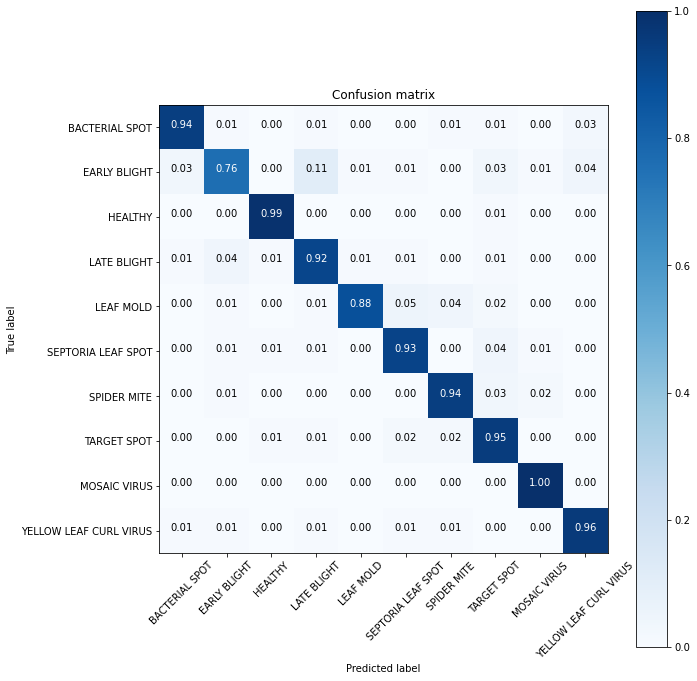

In [70]:
plot_confusion_matrix(cm,['BACTERIAL SPOT','EARLY BLIGHT','HEALTHY','LATE BLIGHT','LEAF MOLD','SEPTORIA LEAF SPOT','SPIDER MITE','TARGET SPOT','MOSAIC VIRUS','YELLOW LEAF CURL VIRUS'],normalize=True)

In [71]:
classifier.save("D:\Jain University Project\Mini project\model10k.h5")

In [72]:
test_loss,test_acc=classifier.evaluate(X_test,one_hot_test)
print("Accuracy is :"+str(test_acc*100)+" %")

38/38 [==============================] - 2s 52ms/step - loss: 0.2771 - accuracy: 0.9258
Accuracy is :92.58333444595337 %


In [73]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [74]:
model = load_model("D:\Jain University Project\Mini project\Saved model\model10k.h5")

In [75]:
img=cv.imread("D:/Jain University Project/Mini project/Data collection/sample for testing/bacterial-spot.jpeg")
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
copy=img
img=cv.resize(img,(64,64))

In [76]:
X_t=np.array(img).reshape(-1,64,64,3)
X_t=X_t/255.0
X_t.shape

(1, 64, 64, 3)

In [77]:
preds = model.predict_classes(X_t)
jagga=preds[0]
CATEGORIES=["Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___healthy","Tomato___Late_blight","Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite","Tomato___Target_spot","Tomato___Tomato_mosaic_virus","Tomato___Tomato_Yellow_Leaf_Curl_Virus"]

Tomato___Late_blight


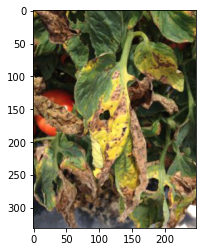

In [78]:
plt.imshow(copy)
print(CATEGORIES[jagga])